* [1.DataOverview](#1.DataOverview)
* [2.Visualization](#2.Visualization)
    * [2.1 Visualization for Category](#21)
    * [2.2 Visualization for correlation](#22)
    * [2.3 Visualization for size](#23)
    * [2.4 Visualization for Content Rating](#24)
    * [2.5 Visualization for Reivews](#25)

In [1]:
import numpy as np
import pandas as pd 
import re #library to clean data
import nltk #Natural Language tool kit
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
import datetime
from nltk.corpus import stopwords #to remove stopword
from nltk.stem.porter import PorterStemmer 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
os.listdir('../input/google-play-store-apps')

['googleplaystore_user_reviews.csv', 'license.txt', 'googleplaystore.csv']

# 1.DataOverview

The googleplaystore.csv include 10,841 data,and the variables include 'App','Category','Rating',and other 10 types.

'Rating','Current Ver','Android Ver','Content Rating',and 'Type' include missing value.You have to watch out for these variables if you 

want to use them.Here I remove the missing value from these variables.If you do not like this method,you can fill the missing value

by mean,median,-999,0,or other method as well.


The googleplaystore_user_reviews.csv include 64,295 data,and the variables include 'App','Translated_Review','Sentiment',

'Sentiment_Polarity', and 'Sentiment_Subjectivity'.






## Please upvote it if you like this kernel.

## Thank you

This photo is from https://ac-illust.com/tw/clip-art/332059/%E6%9F%B4%E7%8A%AC%E9%9E%A0%E8%BA%AC

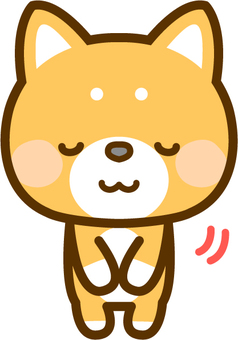

In [3]:
data=pd.read_csv("../input/google-play-store-apps/googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Last Updated         0
Genres               0
Price                0
Installs             0
Size                 0
Reviews              0
Category             0
App                  0
dtype: int64

In [5]:
data_review=pd.read_csv("../input/google-play-store-apps/googleplaystore_user_reviews.csv")
data_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
data_review.isnull().sum().sort_values(ascending=False)

Translated_Review         26868
Sentiment_Subjectivity    26863
Sentiment_Polarity        26863
Sentiment                 26863
App                           0
dtype: int64

In [7]:
print('data size: ',len(data))
print('data_review size: ',len(data_review))

data size:  10841
data_review size:  64295


In [8]:
data=data.dropna(subset=['Rating','Current Ver','Android Ver','Content Rating'])

# 2.Visualization

<h3 id="21">2.1 Visualization for Category </h3>

According to the following bar chart, We know that the most type is 'FAMILY',and the type of 'GAME' has the most reviews and installs.

Text(0.5, 1.0, 'Distribution of rating by Category')

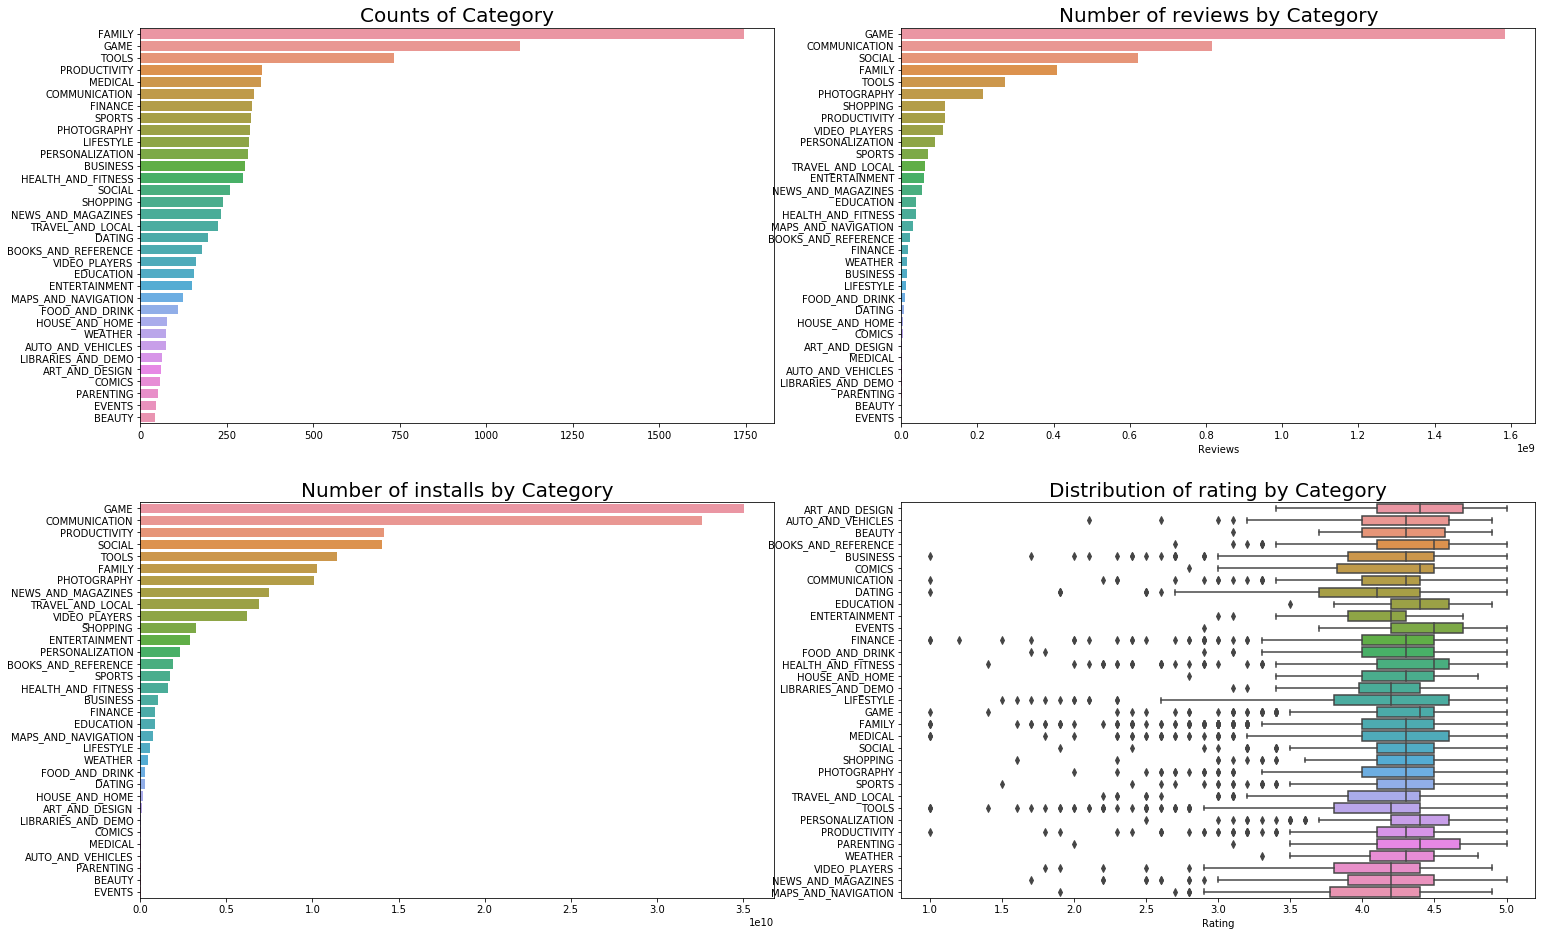

In [9]:
fig,ax=plt.subplots(2,2,figsize=(25,16))
sns.barplot(x=data.Category.value_counts(),y=data.Category.value_counts().index,ax=ax[0,0])
ax[0,0].set_title("Counts of Category",size=20)
ax[0,0].set_xlabel("")

data.Reviews=data.Reviews.astype('int')
sns.barplot(x=data.groupby(['Category'])['Reviews'].agg('sum').sort_values(ascending=False),y=data.groupby(['Category'])['Reviews'].agg('sum').sort_values(ascending=False).index,ax=ax[0,1])
ax[0,1].set_title("Number of reviews by Category",size=20)
ax[0,1].set_ylabel("")

data['new_install']=data.Installs.apply(lambda x:x.split('+')[0].strip(',').replace(',',''))
data.new_install=data.new_install.astype('int')

sns.barplot(x=data.groupby(['Category'])['new_install'].agg('sum').sort_values(ascending=False),y=data.groupby(['Category'])['new_install'].agg('sum').sort_values(ascending=False).index,ax=ax[1,0])
ax[1,0].set_title("Number of installs by Category",size=20)
ax[1,0].set_ylabel("")
ax[1,0].set_xlabel("")

sns.boxplot(y="Category",x="Rating",data=data,ax=ax[1,1])
ax[1,1].set_ylabel("")
ax[1,1].set_title("Distribution of rating by Category",size=20)

<h3 id="22">2.2 Visualization for correlation </h3>

Text(0.5, 1.0, 'correlation plot')

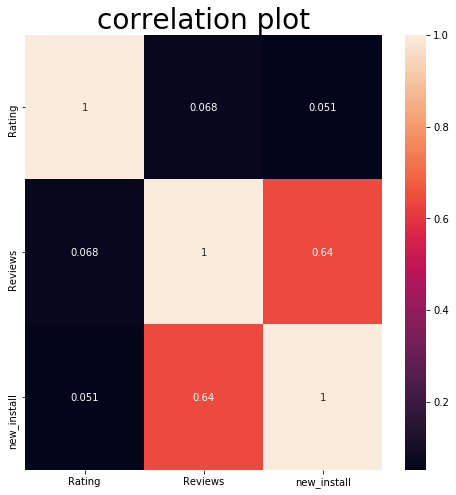

In [10]:
plt.figure(figsize=(8,8))
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
plt.title("correlation plot",size=28)

<h3 id="23">2.3 Visualization for size </h3>

Text(0.5, 1.0, 'Distribution of rating by Size for Top 10')

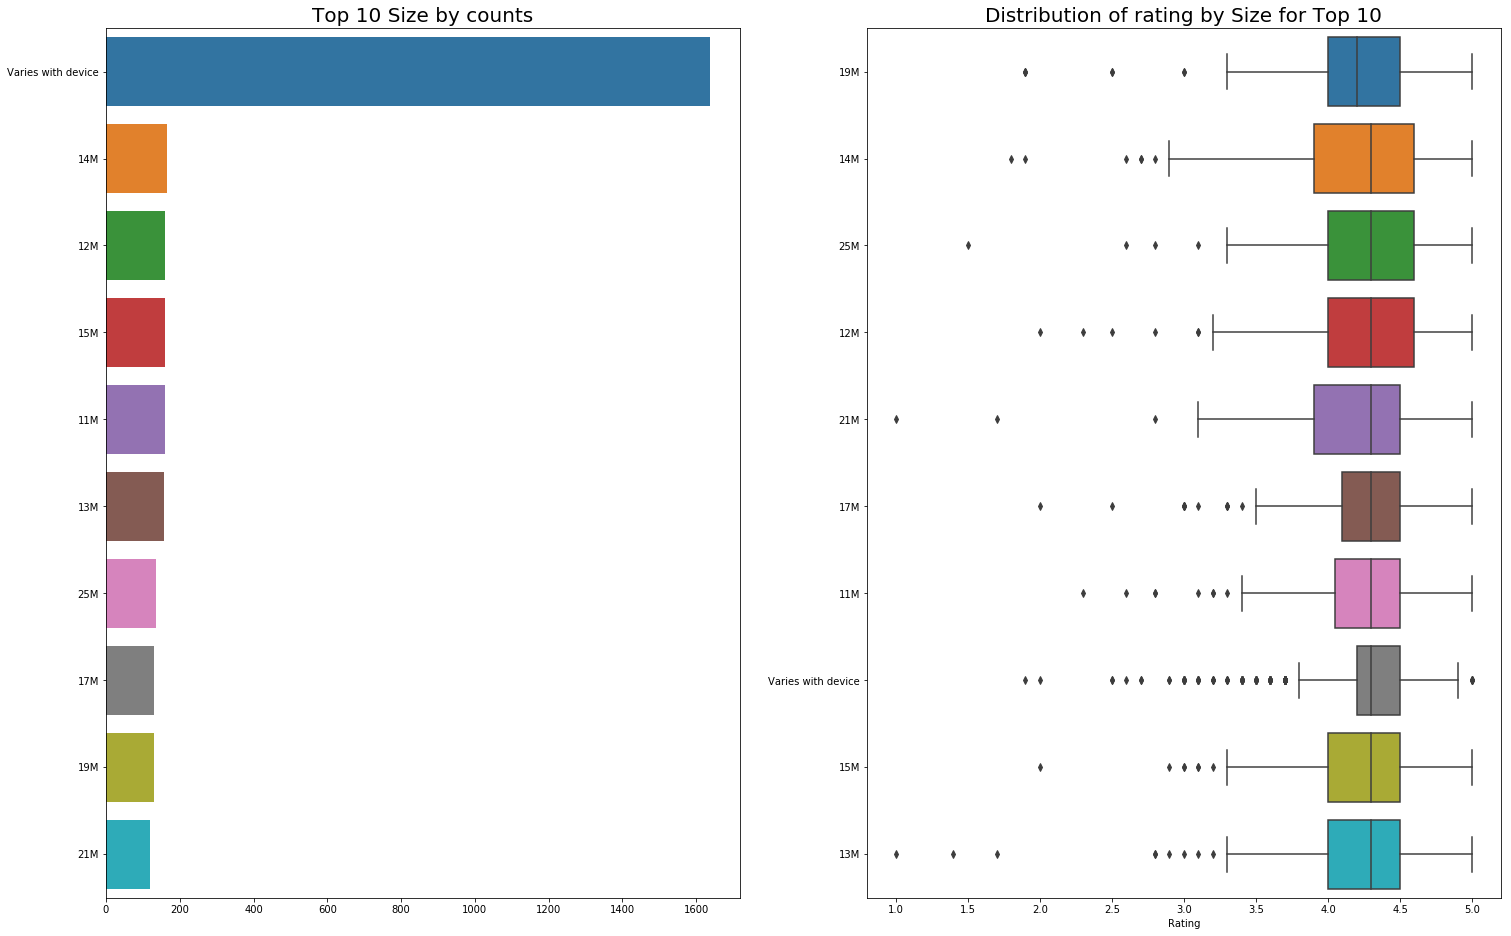

In [11]:
fig,ax=plt.subplots(1,2,figsize=(25,16))
sns.barplot(x=data.Size.value_counts()[:10],y=data.Size.value_counts()[:10].index,ax=ax[0])
ax[0].set_title("Top 10 Size by counts",size=20)
ax[0].set_xlabel("")

sns.boxplot(y="Size",x="Rating",data=data[data.Size.isin(list(data.Size.value_counts()[:10].index))],ax=ax[1])
ax[1].set_ylabel("")
ax[1].set_title("Distribution of rating by Size for Top 10",size=20)

<h3 id="24">2.4 Visualization for Content Rating </h3>

In [12]:
data['new_Price']=data.Price.apply(lambda x:  x.strip('$') if x!='0' else x.strip(''))
data.new_Price=data.new_Price.astype(float)

Text(0.5, 0, 'Total Price')

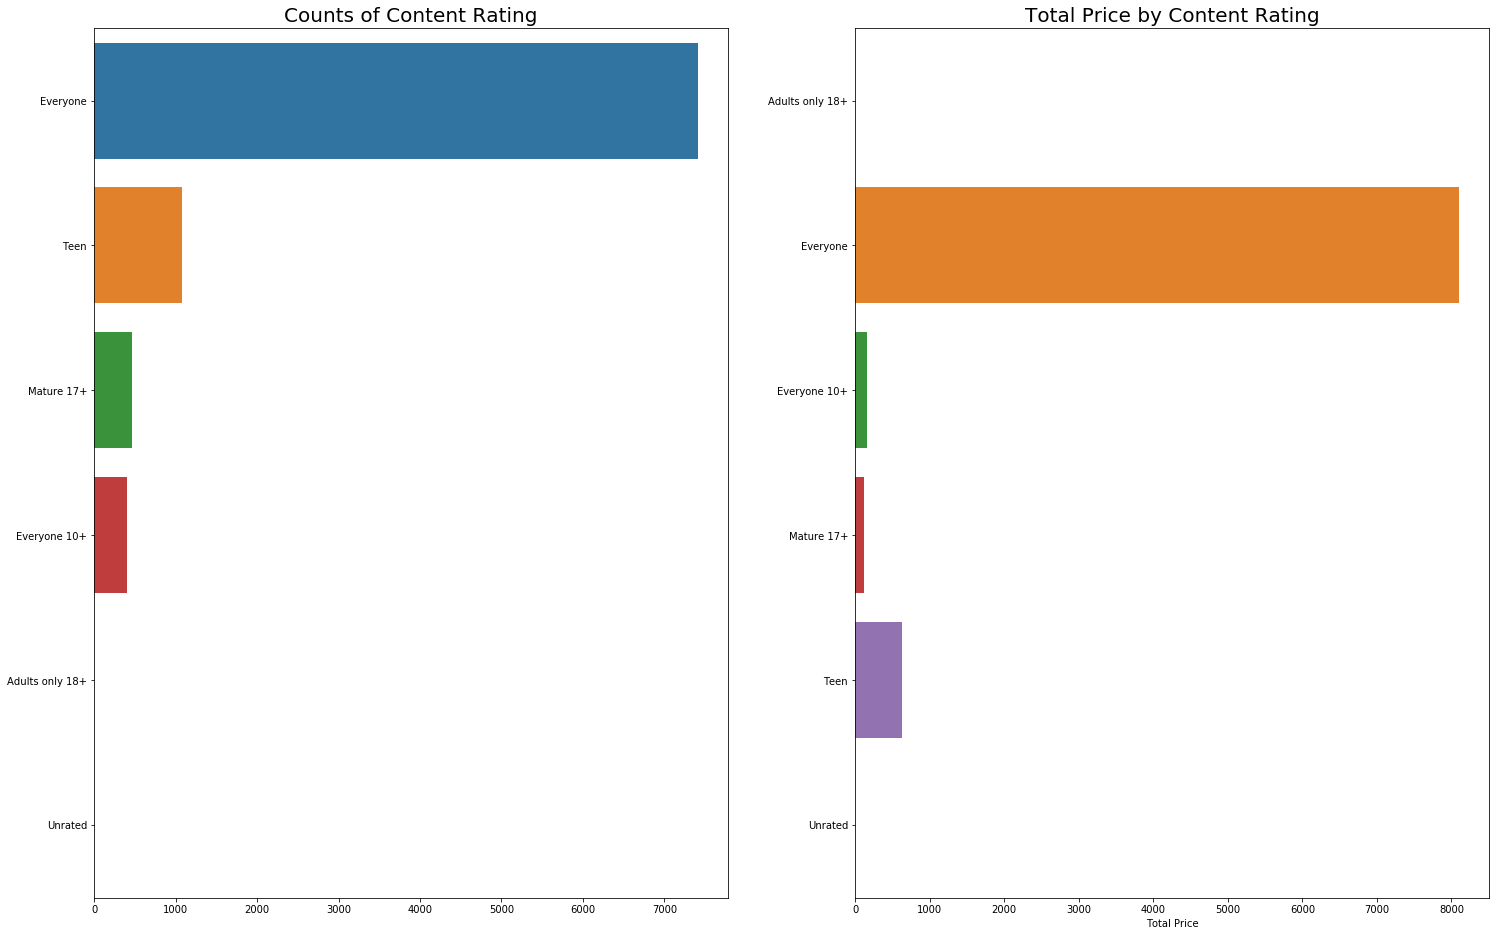

In [13]:
fig,ax=plt.subplots(1,2,figsize=(25,16))
sns.barplot(x=data['Content Rating'].value_counts(),y=data['Content Rating'].value_counts().index,ax=ax[0])
ax[0].set_title("Counts of Content Rating",size=20)
ax[0].set_xlabel("")

sns.barplot(x=data.groupby(['Content Rating'])['new_Price'].agg('sum'),y=data.groupby(['Content Rating'])['new_Price'].agg('sum').index,ax=ax[1])
ax[1].set_title("Total Price by Content Rating",size=20)
ax[1].set_ylabel("")
ax[1].set_xlabel("Total Price")


<h3 id="25">2.5 Visualization for Reivews </h3>

In [14]:
data_review=data_review.dropna(subset=['Translated_Review'])
data_review=data_review.reindex(range(len(data_review)), method='ffill')
headline_text_new=[]#Initialize empty array to append clean text
for i in range(len(data_review)):
    headline=re.sub('[^a-zA-Z]',' ',data_review['Translated_Review'][i]) 
    headline=headline.lower() #convert to lower case
    headline=headline.split() #split to array(default delimiter is " ")
    ps=PorterStemmer() #creating porterStemmer object to take main stem of each word
    headline=[ps.stem(word) for word in headline if not word in set(stopwords.words('english'))] #loop for stemming each word  in string array at ith row
    headline_text_new.extend(headline)

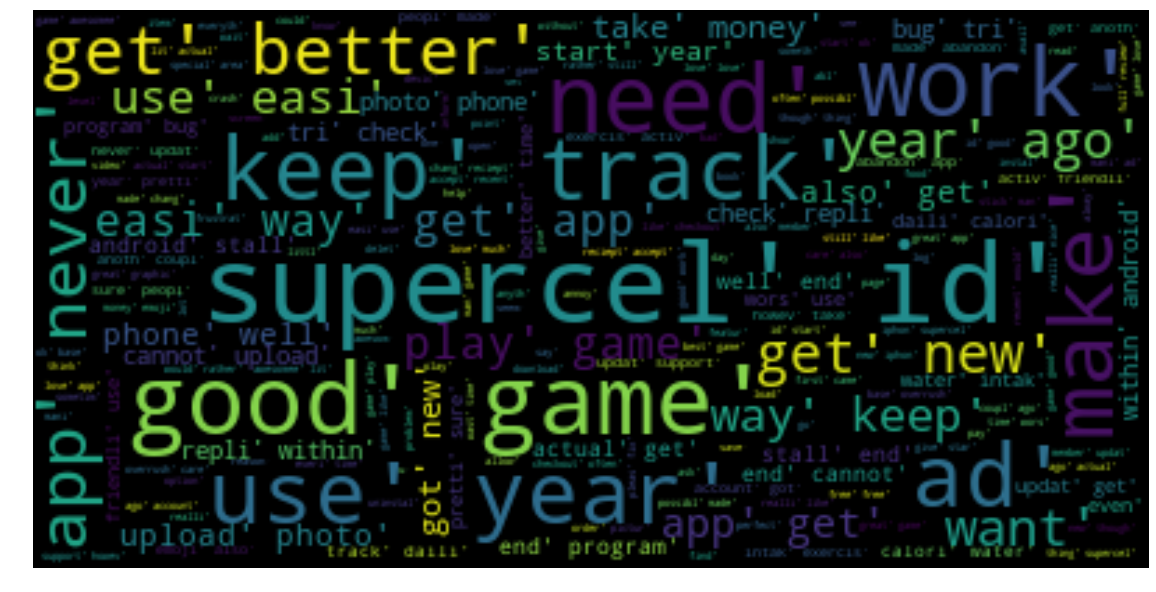

In [15]:
wordcloud = WordCloud(background_color="black",max_words=200,max_font_size=40,random_state=10).generate(str(headline_text_new))

plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()